In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


/Users/hudayusuf/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df=pd.read_excel("/Users/hudayusuf/Downloads/archive-9/Career Mode player datasets - FIFA 15-21.xlsx")

In [3]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,36+3,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3


In [4]:
#### Missing Value ###
df.isnull().sum()

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 106, dtype: int64

In [5]:
##Seperate the joined dates df["joined"] into year, month and columns##

In [6]:
df["joined"]

0       2004-07-01
1       2009-07-01
2       2009-08-28
3       2012-07-01
4       2011-07-01
           ...    
16150   2013-10-22
16151   2014-08-14
16152   2012-07-01
16153   2014-03-11
16154   2006-06-26
Name: joined, Length: 16155, dtype: datetime64[ns]

In [7]:
###Change from series to string type
df["joined"]=df["joined"].astype(str)

In [8]:
new = df['joined'].str.split('-',n=2,expand=True)

In [9]:
new

,0,1,2
0,2004,07,01
1,2009,07,01
2,2009,08,28
3,2012,07,01
4,2011,07,01
...,...,...,...
16150,2013,10,22
16151,2014,08,14
16152,2012,07,01
16153,2014,03,11


In [10]:
df["Year"]=new[0]

In [11]:
df["Month"]=new[1]

In [12]:
df["Day"]=new[2]

In [13]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,rdm,rwb,lb,lcb,cb,rcb,rb,Year,Month,Day
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,54+3,45+3,45+3,45+3,54+3,2004,07,01
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,57+3,52+3,52+3,52+3,57+3,2009,07,01
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,55+3,46+3,46+3,46+3,55+3,2009,08,28
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,65+3,61+3,56+3,55+3,55+3,55+3,56+3,2012,07,01
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,40+3,36+3,36+3,38+3,38+3,38+3,36+3,2011,07,01


In [14]:
######EDA######

In [15]:
#### Most players are from:
df['nationality'].value_counts()

England        1627
Spain          1051
France          958
Argentina       867
Italy           795
               ... 
Kyrgyzstan        1
Fiji              1
Saint Lucia       1
Montserrat        1
Indonesia         1
Name: nationality, Length: 149, dtype: int64

In [16]:
# Players that are from Germany
Germany = df[df['nationality'] == 'Germany']
Germany.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,rdm,rwb,lb,lcb,cb,rcb,rb,Year,Month,Day
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,40+3,36+3,36+3,38+3,38+3,38+3,36+3,2011,07,01
9,121944,https://sofifa.com/player/121944/bastian-schwe...,B. Schweinsteiger,Bastian Schweinsteiger,29,1984-08-01,183,79,Germany,FC Bayern München,...,84+2,81+2,81+2,79+2,79+2,79+2,81+2,2002,07,01
14,121939,https://sofifa.com/player/121939/philipp-lahm/...,P. Lahm,Philipp Lahm,30,1983-11-11,170,66,Germany,FC Bayern München,...,85+2,88+,85+2,81+2,81+2,81+2,85+2,2002,11,01
22,178603,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,25,1988-12-16,192,90,Germany,Borussia Dortmund,...,82+2,79+2,81+2,84+2,84+2,84+2,81+2,2009,07,01
24,188350,https://sofifa.com/player/188350/marco-reus/15...,M. Reus,Marco Reus,25,1989-05-31,181,73,Germany,Borussia Dortmund,...,63+1,64+1,56+1,48+1,48+1,48+1,56+1,2012,07,01


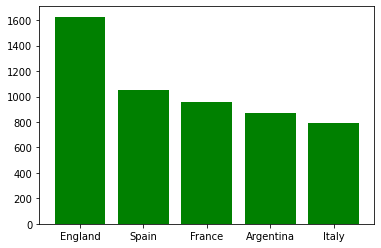

In [17]:
#####Country has Max players####

plt.bar(list(df['nationality'].value_counts()[0:5].keys()),list(df['nationality'].value_counts()[0:5]),color='g')
plt.show()

<AxesSubplot: >

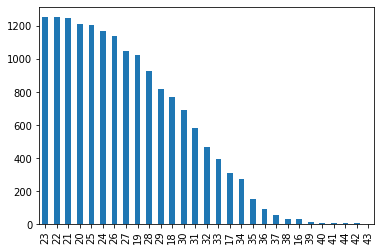

In [18]:
#### age distrubtuion###
df["age"].value_counts().plot(kind="bar")

/Users/hudayusuf/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


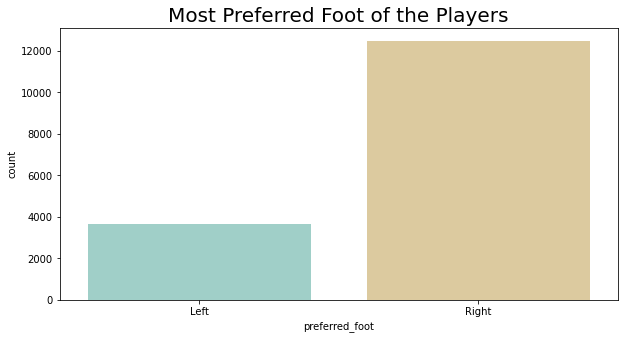

In [19]:
# comparison of preferred foot over the different players

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(df['preferred_foot'], palette = 'BrBG_r')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

In [20]:
###players highest salary
player_salary = df[['short_name','wage_eur']]

In [21]:
player_salary.head()

,short_name,wage_eur
0,L. Messi,550000
1,Cristiano Ronaldo,375000
2,A. Robben,275000
3,Z. Ibrahimović,275000
4,M. Neuer,300000


In [22]:
player_salary = player_salary.sort_values(by=['wage_eur'],ascending=False)

In [23]:
##highest salary

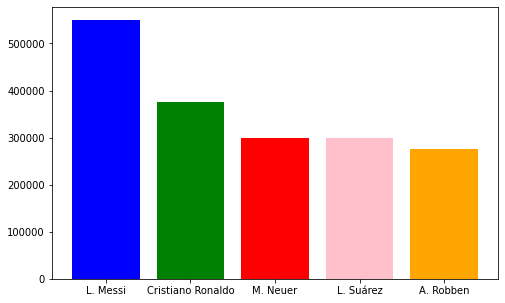

In [24]:
plt.figure(figsize=(8,5))
plt.bar(list(player_salary['short_name'])[0:5],list(player_salary['wage_eur'])[0:5],color=["blue","green","red","pink","orange"])
plt.show()

In [25]:
# Shooting

In [26]:
player_shooting = df[['short_name','shooting']]

In [27]:
player_shooting.sort_values(by=['shooting'],ascending=False).head()

,short_name,shooting
1,Cristiano Ronaldo,93.0
3,Z. Ibrahimović,91.0
8,R. van Persie,90.0
0,L. Messi,89.0
634,L. Podolski,87.0


In [28]:
### The Biggest Rivalry - MESSI VS RONALDO##3
column_r=['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic']
rival = df.head(2)[column_r]
rival= rival.set_index('short_name')
rival.head()

,overall,potential,pace,shooting,passing,dribbling,defending,physic
short_name,,,,,,,,
L. Messi,93,95,93.0,89.0,86.0,96.0,27.0,63.0
Cristiano Ronaldo,92,92,93.0,93.0,81.0,91.0,32.0,79.0
